In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
def get_mta_data(weeks):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df_list = []
    for week in weeks:
        df_list.append(pd.read_csv(url.format(week)))
    return pd.concat(df_list)

In [3]:
mta_df = get_mta_data([170506, 170513, 170520, 170527])

In [4]:
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730


In [5]:
def get_entries(mta_df):
    d = {}
    turnstile_d = {}
    for row in mta_df.itertuples():
        C_A, unit, scp, station, linename = row[1], row[2], row[3], row[4], row[5]
        date = row[7]
        entries = row[10]
        k = (C_A, unit, scp, station, linename, date)
        if k not in d:
            d[k] = [entries]
        else:
            d[k].append(entries)
    for key, value in d.items():
        entry = abs(max(value) - min(value))
        turnstile_d[key] = [entry]
    return turnstile_d

In [6]:
d = get_entries(mta_df)

In [7]:
dict_df = pd.DataFrame.from_dict(d, orient='index')
dict_df.rename(columns = {0:'Entries'}, inplace=True)
dict_df.head(10)

,Entries
"(A002, R051, 02-00-00, 59 ST, NQR456W, 04/29/2017)",781
"(A002, R051, 02-00-00, 59 ST, NQR456W, 04/30/2017)",378
"(A002, R051, 02-00-00, 59 ST, NQR456W, 05/01/2017)",1267
"(A002, R051, 02-00-00, 59 ST, NQR456W, 05/02/2017)",1322
"(A002, R051, 02-00-00, 59 ST, NQR456W, 05/03/2017)",1193
"(A002, R051, 02-00-00, 59 ST, NQR456W, 05/04/2017)",1348
"(A002, R051, 02-00-00, 59 ST, NQR456W, 05/05/2017)",1072
"(A002, R051, 02-00-01, 59 ST, NQR456W, 04/29/2017)",646
"(A002, R051, 02-00-01, 59 ST, NQR456W, 04/30/2017)",538
"(A002, R051, 02-00-01, 59 ST, NQR456W, 05/01/2017)",976


In [8]:
turnstile_df = pd.DataFrame(columns=[])
turnstile_df['C/A'] = [row[0][0] for row in dict_df.itertuples()]
turnstile_df['Unit'] = [row[0][1] for row in dict_df.itertuples()]
turnstile_df['SCP'] = [row[0][2] for row in dict_df.itertuples()]
turnstile_df['Station'] = [row[0][3] for row in dict_df.itertuples()]
turnstile_df['Linename'] = [row[0][4] for row in dict_df.itertuples()]
turnstile_df['Date'] = [row[0][5] for row in dict_df.itertuples()]
turnstile_df['Entries'] = [row[1] for row in dict_df.itertuples()]

In [9]:
turnstile_df.head(10)

,C/A,Unit,SCP,Station,Linename,Date,Entries
0,A002,R051,02-00-00,59 ST,NQR456W,04/29/2017,781
1,A002,R051,02-00-00,59 ST,NQR456W,04/30/2017,378
2,A002,R051,02-00-00,59 ST,NQR456W,05/01/2017,1267
3,A002,R051,02-00-00,59 ST,NQR456W,05/02/2017,1322
4,A002,R051,02-00-00,59 ST,NQR456W,05/03/2017,1193
5,A002,R051,02-00-00,59 ST,NQR456W,05/04/2017,1348
6,A002,R051,02-00-00,59 ST,NQR456W,05/05/2017,1072
7,A002,R051,02-00-01,59 ST,NQR456W,04/29/2017,646
8,A002,R051,02-00-01,59 ST,NQR456W,04/30/2017,538
9,A002,R051,02-00-01,59 ST,NQR456W,05/01/2017,976


In [11]:
def delete_outliers(df, iters=5):
    '''
    finds the max values in a dataframe grouped by columns
    input a data frame
    iters = number of outliers to delete
    '''
    for i in range(iters):
        to_delete_rows = df.loc[df.groupby(["Station","Linename"])['Entries'].idxmax()]
        to_delete_indices = list(to_delete_rows.index.values)
        df.drop(to_delete_indices, inplace=True)
    return df

In [12]:
no_outliers_turnstile_df = delete_outliers(turnstile_df, iters=5)
no_outliers_turnstile_df['Entries'].max()

8170

In [48]:
no_outliers_turnstile_df.groupby(['Linename', 'Station']).sum().sort_values(by='Entries',ascending=False).head(10)
busiest_turnstile_df = no_outliers_turnstile_df.groupby(['Linename','Station']).sum()
busiest_turnstile_df = busiest_turnstile_df.sort_values(by='Entries',ascending=False)[:10]
busiest_turnstile_df.reset_index(inplace=True)
busiest_turnstile_df

,Linename,Station,Entries
0,4567S,GRD CNTRL-42 ST,3197912
1,BDFMNQRW,34 ST-HERALD SQ,2648443
2,ACENQRS1237W,42 ST-PORT AUTH,1963100
3,ACE,34 ST-PENN STA,1721122
4,LNQR456W,14 ST-UNION SQ,1600890
5,7,FLUSHING-MAIN,1353159
6,2345ACJZ,FULTON ST,1344909
7,1237ACENQRSW,TIMES SQ-42 ST,1313401
8,ABCD1,59 ST COLUMBUS,1230768
9,123ACE,34 ST-PENN STA,1230277


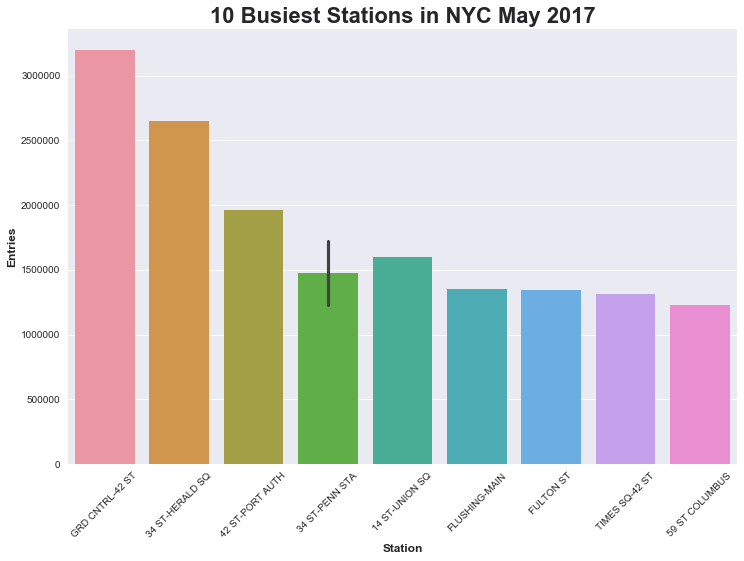

In [18]:
plt.figure(figsize=(12,8))
sb.barplot(busiest_turnstile_df['Station'], busiest_turnstile_df['Entries'])
plt.title('10 Busiest Stations in NYC May 2017',fontsize=22, weight='bold')
plt.xlabel('Station', fontsize=12, weight='bold')
plt.ylabel('Entries', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=10);

In [51]:
busy_stations = busiest_turnstile_df['Station']
df = turnstile_df[turnstile_df['Station'].isin(busy_stations)]
df.groupby(['Linename', 'Station', 'Date']).sum()

,C/A,Unit,SCP,Station,Linename,Date,Entries
434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,04/29/2017,1254
435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,04/30/2017,892
436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,05/01/2017,3106
439,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,05/04/2017,3061
440,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,05/05/2017,2930
441,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,04/29/2017,715
442,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,04/30/2017,521
443,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,05/01/2017,2148
444,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,05/02/2017,2200
445,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,05/03/2017,2313
